In [290]:
import imageio
import numpy as np
import requests as req

In [8]:
raw = req.get('https://raw.githubusercontent.com/deep-learning-with-pytorch/dlwpt-code/master/data/p1ch4/image-dog/bobby.jpg')

img_arr = imageio.imread(raw.content)
img_arr.shape

(720, 1280, 3)

In [18]:
import torch

img = torch.from_numpy(img_arr)
out = img.permute(2, 0, 1)
out

tensor([[[ 77,  77,  78,  ..., 118, 117, 116],
         [ 75,  76,  77,  ..., 118, 117, 116],
         [ 74,  75,  77,  ..., 119, 117, 116],
         ...,
         [215, 216, 217,  ..., 172, 174, 174],
         [215, 216, 217,  ..., 173, 174, 174],
         [215, 216, 217,  ..., 159, 158, 158]],

        [[ 45,  45,  46,  ...,  78,  77,  76],
         [ 43,  44,  45,  ...,  78,  77,  76],
         [ 39,  41,  43,  ...,  80,  77,  76],
         ...,
         [165, 166, 167,  ..., 122, 124, 124],
         [165, 166, 167,  ..., 123, 124, 124],
         [165, 166, 167,  ..., 108, 107, 107]],

        [[ 22,  22,  21,  ...,  52,  51,  51],
         [ 20,  21,  20,  ...,  52,  51,  50],
         [ 17,  16,  18,  ...,  51,  51,  50],
         ...,
         [ 78,  79,  80,  ...,  51,  53,  53],
         [ 78,  79,  80,  ...,  54,  55,  55],
         [ 78,  79,  80,  ...,  42,  41,  41]]], dtype=torch.uint8)

In [20]:
batch_size = 3
batch = torch.zeros(batch_size, 3, 256, 256, dtype=torch.uint8)
batch

tensor([[[[0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          ...,
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0]],

         [[0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          ...,
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0]],

         [[0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          ...,
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0]]],


        [[[0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          ...,
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0]],

         [[0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0

In [30]:
img_dir = r'C:\Users\AbdulrazzakAbd\dlwpt-code\data\p1ch4\image-cats'

import os

img_names = [x for x in os.listdir(img_dir)]
img_names

['cat1.png', 'cat2.png', 'cat3.png']

In [84]:
for i, img_name in enumerate(img_names):
    img_arr = imageio.imread(os.path.join(img_dir, img_name))
    img_t = torch.from_numpy(img_arr).permute(2, 0, 1)
    batch[i] = img_t

In [81]:
batch = batch.float()
batch /= 255

In [86]:
n_channels = batch.shape[1]
for c in range(n_channels):
    mean = torch.mean(batch[:, c])
    std = torch.std(batch[:, c])
    batch[:, c] = (batch[:, c] - mean) / std

In [87]:
batch

tensor([[[[ 0.1439,  0.0730, -0.4234,  ...,  0.0375,  0.0198,  0.1794],
          [ 0.4631, -0.2461,  0.3035,  ..., -0.4944, -0.2107, -0.1752],
          [-0.3703,  0.1439, -0.7249,  ..., -0.2993, -0.0866,  0.2858],
          ...,
          [-0.5653, -0.3171, -0.3348,  ..., -0.3703, -0.5298, -0.6362],
          [-0.3348, -0.3171, -0.4412,  ..., -0.5830, -0.4766, -0.6007],
          [-0.3348, -0.4412, -0.5298,  ..., -0.6185, -0.4766, -0.4944]],

         [[ 0.4632,  0.3874, -0.1058,  ...,  0.3874,  0.3874,  0.6150],
          [ 0.8615,  0.0839,  0.6529,  ..., -0.1816,  0.1408,  0.1787],
          [-0.0299,  0.4822, -0.4661,  ...,  0.0649,  0.2736,  0.7098],
          ...,
          [-0.2954, -0.0868, -0.0678,  ...,  0.0460, -0.1247, -0.2196],
          [-0.0678, -0.0678, -0.1627,  ..., -0.1627, -0.0489, -0.1816],
          [-0.0678, -0.2006, -0.2385,  ..., -0.2196, -0.0868, -0.0678]],

         [[ 0.7792,  0.6573,  0.1495,  ...,  0.8198,  0.8401,  1.1041],
          [ 1.3072,  0.3933,  

In [88]:
img_path = r'C:\Users\AbdulrazzakAbd\dlwpt-code\data\p1ch4\volumetric-dicom\2-LUNG 3.0  B70f-04083'
vol_arr = imageio.volread(img_path, 'DICOM')
vol_arr.shape

Reading DICOM (examining files): 1/99 files (1.0%95/99 files (96.0%99/99 files (100.0%)
  Found 1 correct series.
Reading DICOM (loading data): 48/99  (48.599/99  (100.0%)


(99, 512, 512)

In [94]:
vol = torch.from_numpy(vol_arr)
vol = torch.unsqueeze(vol, 0)
vol.shape, vol

(torch.Size([1, 99, 512, 512]),
 tensor([[[[ -985,  -990,  -999,  ..., -1017, -1008,  -971],
           [-1016,  -984,  -963,  ..., -1000, -1009,  -999],
           [-1024, -1008,  -996,  ...,  -979, -1021,  -987],
           ...,
           [ -920,  -942,  -944,  ...,  -893,  -917,  -955],
           [ -871,  -879,  -905,  ...,  -895,  -869,  -867],
           [ -876,  -855,  -873,  ...,  -933,  -982,  -936]],
 
          [[ -982,  -989, -1020,  ...,  -988,  -977,  -980],
           [-1015,  -969,  -980,  ...,  -981,  -974, -1016],
           [-1020,  -978,  -972,  ...,  -988,  -993, -1015],
           ...,
           [ -880,  -854,  -924,  ...,  -909,  -829,  -829],
           [ -907,  -868,  -928,  ...,  -909,  -901,  -894],
           [ -885,  -850,  -899,  ...,  -977,  -964,  -991]],
 
          [[-1022, -1011,  -983,  ..., -1013,  -980,  -967],
           [-1022, -1005, -1012,  ...,  -948,  -966, -1008],
           [ -991,  -965,  -993,  ...,  -964, -1011,  -996],
           ...,

In [99]:
import numpy as np

wine_path = r'C:\Users\AbdulrazzakAbd\dlwpt-code\data\p1ch4\tabular-wine\winequality-white.csv'
wineq = np.loadtxt(wine_path, dtype=np.float32, delimiter=';', skiprows=1)

In [116]:
import csv

col_lst = next(csv.reader(open(wine_path), delimiter=';'))
col_lst

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

In [115]:
wineq_t = torch.from_numpy(wineq)
wineq_t.shape, wineq_t.dtype

(torch.Size([4898, 12]), torch.float32)

In [117]:
data = wineq_t [:, :-1]
data, data.shape

(tensor([[ 7.0000,  0.2700,  0.3600,  ...,  3.0000,  0.4500,  8.8000],
         [ 6.3000,  0.3000,  0.3400,  ...,  3.3000,  0.4900,  9.5000],
         [ 8.1000,  0.2800,  0.4000,  ...,  3.2600,  0.4400, 10.1000],
         ...,
         [ 6.5000,  0.2400,  0.1900,  ...,  2.9900,  0.4600,  9.4000],
         [ 5.5000,  0.2900,  0.3000,  ...,  3.3400,  0.3800, 12.8000],
         [ 6.0000,  0.2100,  0.3800,  ...,  3.2600,  0.3200, 11.8000]]),
 torch.Size([4898, 11]))

In [232]:
target = wineq_t[:, -1].float()
target, target.shape

(tensor([6., 6., 6.,  ..., 6., 7., 6.]), torch.Size([4898]))

In [233]:
target_1h = torch.zeros(target.shape[0], 10)
target_1h

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [234]:
target_1h.scatter_(1, target.unsqueeze(1).long(),  1)

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 1., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [246]:
data

tensor([[ 7.0000,  0.2700,  0.3600,  ...,  3.0000,  0.4500,  8.8000],
        [ 6.3000,  0.3000,  0.3400,  ...,  3.3000,  0.4900,  9.5000],
        [ 8.1000,  0.2800,  0.4000,  ...,  3.2600,  0.4400, 10.1000],
        ...,
        [ 6.5000,  0.2400,  0.1900,  ...,  2.9900,  0.4600,  9.4000],
        [ 5.5000,  0.2900,  0.3000,  ...,  3.3400,  0.3800, 12.8000],
        [ 6.0000,  0.2100,  0.3800,  ...,  3.2600,  0.3200, 11.8000]])

In [249]:
data_means = data.mean(0)
data_means

tensor([6.8548e+00, 2.7824e-01, 3.3419e-01, 6.3914e+00, 4.5772e-02, 3.5308e+01,
        1.3836e+02, 9.9403e-01, 3.1883e+00, 4.8985e-01, 1.0514e+01])

In [250]:
data_var = data.var(0)
data_var

tensor([7.1211e-01, 1.0160e-02, 1.4646e-02, 2.5726e+01, 4.7733e-04, 2.8924e+02,
        1.8061e+03, 8.9455e-06, 2.2801e-02, 1.3025e-02, 1.5144e+00])

In [282]:
data_normalized = (data - data_means) / torch.sqrt(data_var)
data_normalized

tensor([[ 1.7208e-01, -8.1761e-02,  2.1326e-01,  ..., -1.2468e+00,
         -3.4915e-01, -1.3930e+00],
        [-6.5743e-01,  2.1587e-01,  4.7996e-02,  ...,  7.3995e-01,
          1.3422e-03, -8.2419e-01],
        [ 1.4756e+00,  1.7450e-02,  5.4378e-01,  ...,  4.7505e-01,
         -4.3677e-01, -3.3663e-01],
        ...,
        [-4.2043e-01, -3.7940e-01, -1.1915e+00,  ..., -1.3130e+00,
         -2.6153e-01, -9.0545e-01],
        [-1.6054e+00,  1.1666e-01, -2.8253e-01,  ...,  1.0049e+00,
         -9.6251e-01,  1.8574e+00],
        [-1.0129e+00, -6.7703e-01,  3.7852e-01,  ...,  4.7505e-01,
         -1.4882e+00,  1.0448e+00]])

In [291]:
bad_indices = target <= 3
bad_indices.shape, bad_indices.dtype, bad_indices.sum()

(torch.Size([4898]), torch.bool, tensor(20))

In [295]:
bad_data = data[bad_indices]
mid_data = data[(target > 3) & (target < 7)]
good_data = data[target >= 7]

In [308]:
bad_mean = torch.mean(bad_data, dim=0)
mid_mean = torch.mean(mid_data, dim=0)
good_mean = torch.mean(good_data, dim=0)

for i, args in enumerate(zip(col_lst, bad_mean, mid_mean, good_mean)):
    print('{:2} {:25} {:16.2f} {:16.2f} {:16.2f}'.format(i, *args))

 0 fixed acidity                         7.60             6.89             6.73
 1 volatile acidity                      0.33             0.28             0.27
 2 citric acid                           0.34             0.34             0.33
 3 residual sugar                        6.39             6.71             5.26
 4 chlorides                             0.05             0.05             0.04
 5 free sulfur dioxide                  53.33            35.42            34.55
 6 total sulfur dioxide                170.60           141.83           125.25
 7 density                               0.99             0.99             0.99
 8 pH                                    3.19             3.18             3.22
 9 sulphates                             0.47             0.49             0.50
10 alcohol                              10.34            10.26            11.42


In [310]:
total_sulfur_threshold = 141.83
total_sulfur_col = data[:,6]
predicted_indices = torch.lt(total_sulfur_col, total_sulfur_threshold)

predicted_indices.shape, predicted_indices.dtype, predicted_indices.sum()

(torch.Size([4898]), torch.bool, tensor(2727))

In [315]:
actual_indices = target > 5

actual_indices.shape, actual_indices.dtype, actual_indices.sum().item()

(torch.Size([4898]), torch.bool, 3258)

In [316]:
n_matches = torch.sum(actual_indices & predicted_indices).item()
n_predicted = torch.sum(predicted_indices).item()
n_actual = torch.sum(actual_indices).item()

n_matches, n_matches/n_predicted, n_matches/n_actual

(2018, 0.74000733406674, 0.6193984039287906)

In [338]:
bikes_np = np.loadtxt(r"C:\Users\AbdulrazzakAbd\dlwpt-code\data\p1ch4\bike-sharing-dataset\hour-fixed.csv",
                      dtype=np.float32,
                      delimiter=',',
                      skiprows=1,
                      converters={1: lambda x: float(x[8:10])})
bikes_np

array([[1.0000e+00, 1.0000e+00, 1.0000e+00, ..., 3.0000e+00, 1.3000e+01,
        1.6000e+01],
       [2.0000e+00, 1.0000e+00, 1.0000e+00, ..., 8.0000e+00, 3.2000e+01,
        4.0000e+01],
       [3.0000e+00, 1.0000e+00, 1.0000e+00, ..., 5.0000e+00, 2.7000e+01,
        3.2000e+01],
       ...,
       [1.7377e+04, 3.1000e+01, 1.0000e+00, ..., 7.0000e+00, 8.3000e+01,
        9.0000e+01],
       [1.7378e+04, 3.1000e+01, 1.0000e+00, ..., 1.3000e+01, 4.8000e+01,
        6.1000e+01],
       [1.7379e+04, 3.1000e+01, 1.0000e+00, ..., 1.2000e+01, 3.7000e+01,
        4.9000e+01]], dtype=float32)

In [339]:
bikes = torch.from_numpy(bikes_np)
bikes

tensor([[1.0000e+00, 1.0000e+00, 1.0000e+00,  ..., 3.0000e+00, 1.3000e+01,
         1.6000e+01],
        [2.0000e+00, 1.0000e+00, 1.0000e+00,  ..., 8.0000e+00, 3.2000e+01,
         4.0000e+01],
        [3.0000e+00, 1.0000e+00, 1.0000e+00,  ..., 5.0000e+00, 2.7000e+01,
         3.2000e+01],
        ...,
        [1.7377e+04, 3.1000e+01, 1.0000e+00,  ..., 7.0000e+00, 8.3000e+01,
         9.0000e+01],
        [1.7378e+04, 3.1000e+01, 1.0000e+00,  ..., 1.3000e+01, 4.8000e+01,
         6.1000e+01],
        [1.7379e+04, 3.1000e+01, 1.0000e+00,  ..., 1.2000e+01, 3.7000e+01,
         4.9000e+01]])

In [341]:
bikes.shape, bikes.stride()

(torch.Size([17520, 17]), (17, 1))

In [532]:
daily_bikes = bikes.view(-1, 24, bikes.shape[1])
daily_bikes.shape, daily_bikes.stride()

(torch.Size([730, 24, 17]), (408, 17, 1))

In [516]:
daily_bikes

tensor([[[1.0000e+00, 1.0000e+00, 1.0000e+00,  ..., 3.0000e+00,
          1.3000e+01, 1.6000e+01],
         [2.0000e+00, 1.0000e+00, 1.0000e+00,  ..., 8.0000e+00,
          3.2000e+01, 4.0000e+01],
         [3.0000e+00, 1.0000e+00, 1.0000e+00,  ..., 5.0000e+00,
          2.7000e+01, 3.2000e+01],
         ...,
         [2.2000e+01, 1.0000e+00, 1.0000e+00,  ..., 3.0000e+00,
          3.1000e+01, 3.4000e+01],
         [2.3000e+01, 1.0000e+00, 1.0000e+00,  ..., 1.1000e+01,
          1.7000e+01, 2.8000e+01],
         [2.4000e+01, 1.0000e+00, 1.0000e+00,  ..., 1.5000e+01,
          2.4000e+01, 3.9000e+01]],

        [[2.5000e+01, 2.0000e+00, 1.0000e+00,  ..., 4.0000e+00,
          1.3000e+01, 1.7000e+01],
         [2.6000e+01, 2.0000e+00, 1.0000e+00,  ..., 1.0000e+00,
          1.6000e+01, 1.7000e+01],
         [2.7000e+01, 2.0000e+00, 1.0000e+00,  ..., 1.0000e+00,
          8.0000e+00, 9.0000e+00],
         ...,
         [4.5000e+01, 2.0000e+00, 1.0000e+00,  ..., 1.1000e+01,
          2.000

In [362]:
first_day = bikes[:24].long()
weather_onehot = torch.zeros(first_day.shape[0], 4)

In [365]:
weather_onehot.scatter_(1, index=first_day[:,9].unsqueeze(1).long() - 1, value=1.0)

tensor([[1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 1., 0., 0.],
        [0., 1., 0., 0.],
        [0., 1., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 1., 0.],
        [0., 1., 0., 0.],
        [0., 1., 0., 0.],
        [0., 1., 0., 0.],
        [0., 1., 0., 0.]])

In [366]:
first_day

tensor([[  1,   1,   1,   0,   1,   0,   0,   6,   0,   1,   0,   0,   0,   0,
           3,  13,  16],
        [  2,   1,   1,   0,   1,   1,   0,   6,   0,   1,   0,   0,   0,   0,
           8,  32,  40],
        [  3,   1,   1,   0,   1,   2,   0,   6,   0,   1,   0,   0,   0,   0,
           5,  27,  32],
        [  4,   1,   1,   0,   1,   3,   0,   6,   0,   1,   0,   0,   0,   0,
           3,  10,  13],
        [  5,   1,   1,   0,   1,   4,   0,   6,   0,   1,   0,   0,   0,   0,
           0,   1,   1],
        [  6,   1,   1,   0,   1,   5,   0,   6,   0,   2,   0,   0,   0,   0,
           0,   1,   1],
        [  7,   1,   1,   0,   1,   6,   0,   6,   0,   1,   0,   0,   0,   0,
           2,   0,   2],
        [  8,   1,   1,   0,   1,   7,   0,   6,   0,   1,   0,   0,   0,   0,
           1,   2,   3],
        [  9,   1,   1,   0,   1,   8,   0,   6,   0,   1,   0,   0,   0,   0,
           1,   7,   8],
        [ 10,   1,   1,   0,   1,   9,   0,   6,   0,   1,   0, 

In [454]:
torch.cat((bikes[:24], weather_onehot), 1)[:1]

tensor([[ 1.0000,  1.0000,  1.0000,  0.0000,  1.0000,  0.0000,  0.0000,  6.0000,
          0.0000,  1.0000,  0.2400,  0.2879,  0.8100,  0.0000,  3.0000, 13.0000,
         16.0000,  1.0000,  0.0000,  0.0000,  0.0000]])

In [503]:
daily_weather_onehot = torch.zeros(daily_bikes.shape[0], daily_bikes.shape[1],
                                   4)
daily_weather_onehot.shape, daily_weather_onehot

(torch.Size([730, 24, 4]),
 tensor([[[0., 0., 0., 0.],
          [0., 0., 0., 0.],
          [0., 0., 0., 0.],
          ...,
          [0., 0., 0., 0.],
          [0., 0., 0., 0.],
          [0., 0., 0., 0.]],
 
         [[0., 0., 0., 0.],
          [0., 0., 0., 0.],
          [0., 0., 0., 0.],
          ...,
          [0., 0., 0., 0.],
          [0., 0., 0., 0.],
          [0., 0., 0., 0.]],
 
         [[0., 0., 0., 0.],
          [0., 0., 0., 0.],
          [0., 0., 0., 0.],
          ...,
          [0., 0., 0., 0.],
          [0., 0., 0., 0.],
          [0., 0., 0., 0.]],
 
         ...,
 
         [[0., 0., 0., 0.],
          [0., 0., 0., 0.],
          [0., 0., 0., 0.],
          ...,
          [0., 0., 0., 0.],
          [0., 0., 0., 0.],
          [0., 0., 0., 0.]],
 
         [[0., 0., 0., 0.],
          [0., 0., 0., 0.],
          [0., 0., 0., 0.],
          ...,
          [0., 0., 0., 0.],
          [0., 0., 0., 0.],
          [0., 0., 0., 0.]],
 
         [[0., 0., 0., 0.],

In [507]:
daily_weather_onehot.scatter_(2, daily_bikes[:,:,9].long().unsqueeze(2) - 1, 1.0)

tensor([[[1., 0., 0., 0.],
         [1., 0., 0., 0.],
         [1., 0., 0., 0.],
         ...,
         [0., 1., 0., 0.],
         [0., 1., 0., 0.],
         [0., 1., 0., 0.]],

        [[0., 1., 0., 0.],
         [0., 1., 0., 0.],
         [0., 1., 0., 0.],
         ...,
         [1., 0., 0., 0.],
         [1., 0., 0., 0.],
         [1., 0., 0., 0.]],

        [[1., 0., 0., 0.],
         [1., 0., 0., 0.],
         [1., 0., 0., 0.],
         ...,
         [1., 0., 0., 0.],
         [1., 0., 0., 0.],
         [1., 0., 0., 0.]],

        ...,

        [[0., 1., 0., 0.],
         [0., 1., 0., 0.],
         [0., 1., 0., 0.],
         ...,
         [0., 1., 0., 0.],
         [0., 1., 0., 0.],
         [0., 1., 0., 0.]],

        [[0., 1., 0., 0.],
         [0., 1., 0., 0.],
         [0., 1., 0., 0.],
         ...,
         [1., 0., 0., 0.],
         [1., 0., 0., 0.],
         [1., 0., 0., 0.]],

        [[1., 0., 0., 0.],
         [1., 0., 0., 0.],
         [1., 0., 0., 0.],
         ...,
 

In [509]:
daily_weather_onehot.shape

torch.Size([730, 24, 4])

In [533]:
daily_bikes = daily_bikes.transpose(1, 2)
daily_weather_onehot = daily_weather_onehot.transpose(1, 2)

daily_bikes.shape, daily_weather_onehot.shape

(torch.Size([730, 17, 24]), torch.Size([730, 4, 24]))

In [534]:
daily_bikes = torch.cat((daily_bikes, daily_weather_onehot), dim=1)
daily_bikes.shape

torch.Size([730, 21, 24])

In [541]:
daily_bikes[:, 9, :] = (daily_bikes[:, 9, :] - 1) / 3

In [547]:
daily_bikes[:, 9, :]

tensor([[0.0000, 0.0000, 0.0000,  ..., 0.3333, 0.3333, 0.3333],
        [0.3333, 0.3333, 0.3333,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        ...,
        [0.3333, 0.3333, 0.3333,  ..., 0.3333, 0.3333, 0.3333],
        [0.3333, 0.3333, 0.3333,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]])

In [548]:
temp = daily_bikes[:, 10, :]
temp_min = torch.min(temp)
temp_max = torch.max(temp)
daily_bikes[:, 10, :] = (daily_bikes[:, 10, :] - temp_min) / (temp_max - temp_min)
daily_bikes[:, 10, :]

tensor([[0.2245, 0.2041, 0.2041,  ..., 0.3878, 0.3878, 0.4490],
        [0.4490, 0.4286, 0.4082,  ..., 0.2449, 0.2245, 0.2041],
        [0.2041, 0.1837, 0.1837,  ..., 0.1633, 0.1224, 0.1633],
        ...,
        [0.2245, 0.2245, 0.2245,  ..., 0.2653, 0.2449, 0.2449],
        [0.2449, 0.2449, 0.2449,  ..., 0.1837, 0.1837, 0.1837],
        [0.1633, 0.1633, 0.1429,  ..., 0.2449, 0.2449, 0.2449]])

In [551]:
with open(r'C:\Users\AbdulrazzakAbd\dlwpt-code\data\p1ch4\jane-austen\1342-0.txt', encoding='utf-8') as f:
    text = f.read()

In [565]:
lines = text.split('\n')
line = lines[200]
line

'“Impossible, Mr. Bennet, impossible, when I am not acquainted with him'

In [563]:
letter_t = torch.zeros(len(line), 128)
letter_t.shape

torch.Size([70, 128])

In [569]:
for i, letter in enumerate(line.lower().strip()):
    letter_index = ord(letter) if ord(letter) < 128 else 0
    letter_t[i][letter_index] = 1

In [571]:
letter_t.sum()

tensor(70.)

In [587]:
from string import punctuation

def clean_words(input_str):
    punc = punctuation + '“”"_-'
    words = input_str.lower().replace('\n', ' ').split()
    words = [word.strip(punc) for word in words]
    return words

cleansed_line = clean_words(line)

In [586]:
word_list = sorted(set(clean_words(text)))
words_dict = {word: i for (i, word) in enumerate(word_list)}
words_dict['impossible']

3326

In [588]:
word_t = torch.zeros(len(cleansed_line), len(words_dict))
for i, word in enumerate(cleansed_line):
    index = words_dict[word]
    word_t[i][index] = 1
    print('{:2} {:4} {}'.format(i, index, word))

 0 3326 impossible
 1 4225 mr
 2  758 bennet
 3 3326 impossible
 4 6986 when
 5 3247 i
 6  364 am
 7 4353 not
 8  188 acquainted
 9 7054 with
10 3148 him


In [589]:
print(word_t.shape)

torch.Size([11, 7165])


In [599]:
red = 'http://www.peterleymanorfarm.co.uk/wp-content/uploads/2015/02/strawberries-640x399.jpg'
blue = 'https://c.tadst.com/gfx/600x337/full-moon-peeking-tree-branches-fog.jpg?1'
green = 'https://images.unsplash.com/photo-1567100160498-848b51e9173f?ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&ixlib=rb-1.2.1&auto=format&fit=crop&w=1000&q=80'

def tensor_from_img(url):
    raw = req.get(url)
    img_arr = imageio.imread(raw.content)
    return torch.from_numpy(img_arr).permute(2, 0, 1)

In [601]:
red_t = tensor_from_img(red)
red_t.shape, red_t.float().mean()

(torch.Size([3, 399, 640]), tensor(87.1942))

In [602]:
blue_t = tensor_from_img(blue)
blue_t.shape, blue_t.float().mean()

(torch.Size([3, 337, 600]), tensor(115.3923))

In [603]:
green_t = tensor_from_img(green)
green_t.shape, green_t.float().mean()

(torch.Size([3, 1779, 1000]), tensor(74.1028))

In [610]:
get_colors = lambda x: (x[0].float().mean().item(), x[1].float().mean().item(), x[2].float().mean().item())

In [611]:
get_colors(red_t)

(195.9056396484375, 37.19704818725586, 28.479820251464844)

In [612]:
get_colors(blue_t)

(45.710262298583984, 107.7797622680664, 192.68690490722656)

In [613]:
get_colors(green_t)

(63.44024658203125, 109.62515258789062, 49.243080139160156)

In [627]:
blue_t[1] = 0

In [615]:
from torchvision import transforms

imout = transforms.ToPILImage()

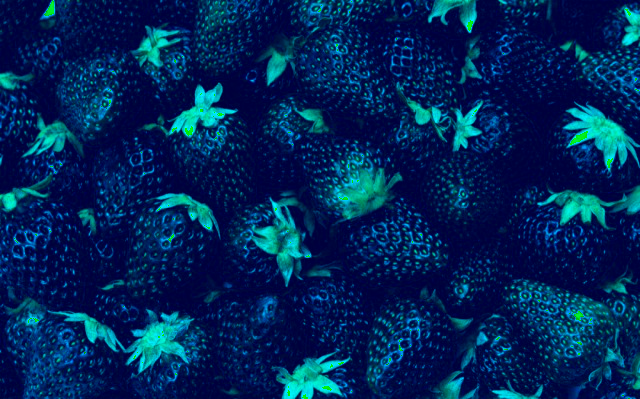

In [621]:
imout(red_t)

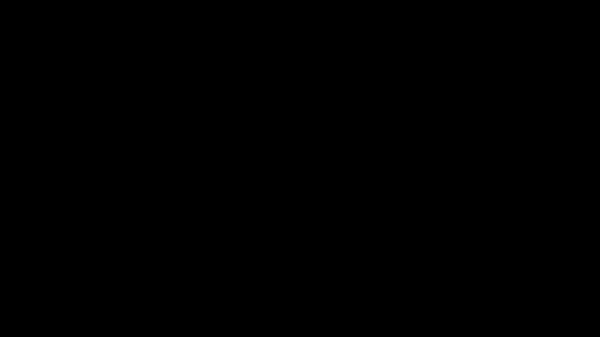

In [628]:
imout(blue_t)